<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/1117_%EB%94%A5%EB%9F%AC%EB%8B%9D_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**11/20(월) 과제 - 파이썬 딥러닝 텐서플로 ch3.1 ~ 3 pg. 50 ~ 86 필사**

---

# **CH3. Keras**
## **01. 딥러닝 준비**
### **1-1. 주요 용어**

**1-1-1. 하이퍼파라미터**

   하이퍼파라미터는 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값을 뜻한다.

   * 모델이 훈련하면서 가중치와 편향은 자동 업데이트 되고 조정되며 알아서 변하는 값
   * 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많다.
   * 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는데 많은 시간을 투자하는 것이 일반적 => 이러한 행위를 하이퍼파라미터 튜닝이라고 한다.


**1-1-2. 과소적합 vs 과대적합**

머신러닝에서 주어진 훈련 데이터에서 패턴 학습을 통해 모델을 완성해나간다. 훈련용 데이터를 반복적으로 학습하면서 모델은 사람이 발견하지 못하는 패턴을 발견하므로써 사람의 예측성능을 뛰어 넘는 모델을 생성할 수 있다.

But, 예측할 데이터가 모델이 학습한데이터와 다른 분포를 갖거나 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어지게 된다.

* 과소적합 : 모델이 충분히 학습되지 않은 경우
* 과대적합 : 지나치게 반복 학습되어 과하게 적합된 경우

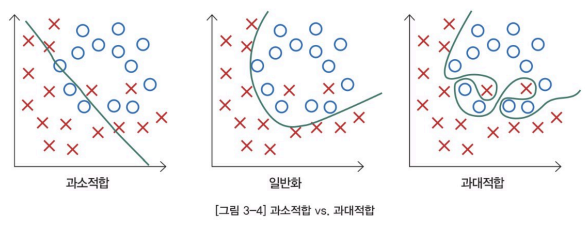

**1-1-3. 에포크**

딥러닝은 데이터셋을 학습하는 과정을 여러번 반복하면서 최적의 모델 가중치를 찾는 과정이다. 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부학습에 사용하는 1회의 훈련 루프를 1epoch라고 한다.

**1-1-4. 손실함수**

예측 값과 정답 값의 차이 또는 오차를 말한다.

* 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해아 한다. 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적이다.

* 이진 분류(binary classification)
    * binary_crossentropy 손실함수 사용, 출력층의 활성화 함수(activation function)로 'sigmoid' 사용
* 다중 분류(multi-class classification)
    * 원핫 벡터인 경우: categorical_crossentropy 손실함수 사용
    * 레이블 값(예시:0,1,2,3,...)인 경우: sparse_categorical_crossentropy 손실함수 사용,  출력층의 활성화 함수로 'softmax' 사용
* 회귀 모델 : mean_squared_error, mean absolute_error, huber

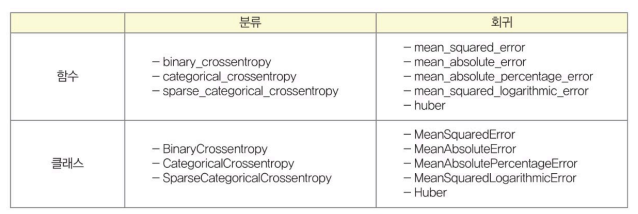

In [1]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

**1-1-5. 경사하강법**

경사하강법은 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법이다.

* 딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다.

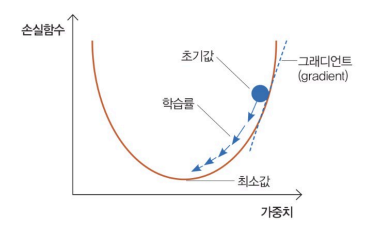

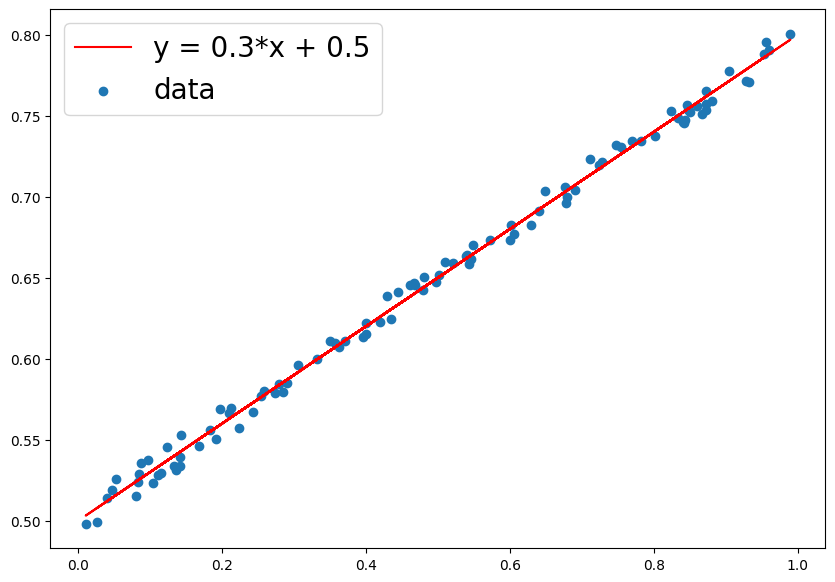

w:0.3,b:0.5


In [2]:
# 단순 선형회귀 수식(y=wx+b)이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

=> 실제 생성된 y 데이터는 y=0.3x+0.5 식과 완벽히 일치하지 않고 약간의 노이즈가 추가된 것을 확인할 수 있다.

* 넘파이로 최적화하는 과정

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.26383, b = 0.31207 error = 15.16782
 5 w = 0.34046, b = 0.47738 error = 0.00999
10 w = 0.33468, b = 0.48188 error = 0.00701
15 w = 0.32929, b = 0.48470 error = 0.00545
------------------------------------------------------------
17 w = 0.3, b = 0.5 error = 0.00496


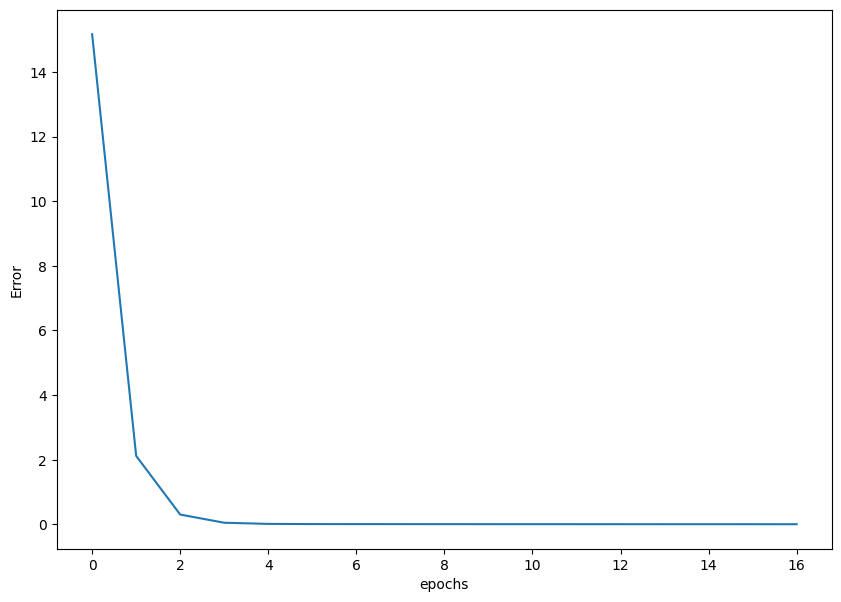

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("epochs")
plt.ylabel('Error')
plt.show()

=> 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는속도는 차이가 있다. 하지만 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 된다.

### **1-2. 딥러닝 프로세스**

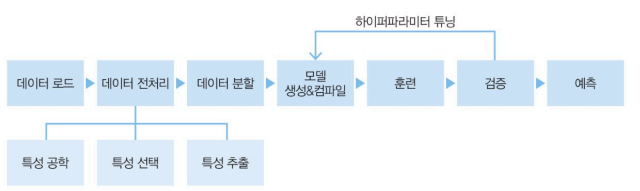

**1-2-1. 데이터 전처리**

데이터를 모델에 주입하기 전에 데이터를 가공하는 단계

* 데이터 셋의 종류와 적용하려는 문제 유형에 따라 전처리 방법은 다양하다.
* 때에 따라서는 배열의 차원을 변경하거나 스케일링을 조정할 수 있다.

**1-2-2. 모델 생성**

모델의 구조를 정의하고 생성하는 단계
* 순차적인 구조의 모델 : Sequential API로 구현
* 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델 : Functional API 혹은 Model Subclassing 방법으로 구현


**1-2-3. 모델 컴파일**

딥러닝 모델의 구조를 정의하고 생성한 뒤에는 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의한다. 모델 인스턴스에 compile() 메소드를 적용하고 앞에서 열거한 여러가지 속성 값을 설정한다.

**1-2-4. 모델 훈련**

모델을 훈련하는 단계이다.
* fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달
* 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정


**1-2-5. 모델 검증**

훈련이 완료된 모델을 검증하는 단계이다.

* 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다.
* 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델을 수정하고, 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 반복한다.

**1-2-6. 모델 예측**

훈련과 검증이 완료된 모델로 테스트 셋에 대하여 모델이 예측하고 그 결과를 반환한다.

## **02. 단순 신경망 훈련**

### **2-1. 선형회귀**

회귀분석이란 하나 이상의 독립변수들이 종속 변수에 미치는 영향을 추정하는 통계 기법이다.
* 단순 선형 회귀 : 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있다.
* 모델의 기울기 a와 절편 를 업데이트하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해나간다.

### **2-2. 뉴런**

뉴런은 인공 신경망 모델을 구성하는 하나의 신경을 의미한다. 뉴런은 노드라고도 불리우고 같은 의미를 가지며 혼용하여 사용한다.
* 신경망은 여러 개의 레어이를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성된다.
* 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 된다.

### **2-3. Dense 레이어**

Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어이다.
* 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층이라고 부르기도 한다.
* Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있다.

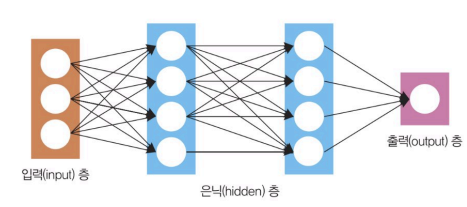

In [5]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### **2-4. 데이터셋 만들기**

단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해서 x, y 데이터를 생성한다.

In [6]:
x= np.arange(1,6)

y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


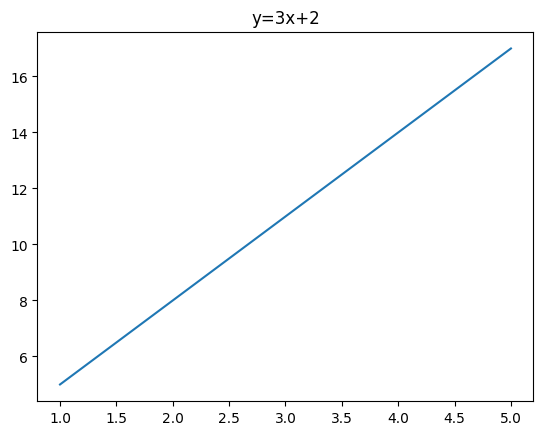

In [7]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

### **2-5. Sequential API**

Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있다.
* Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식이다. 따라서, 입력 레이어부터 출력 레이어까지 순서를 가진다.
* 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있다.

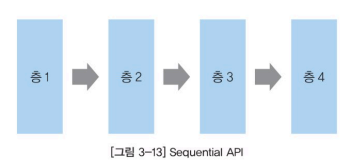

**2-5-1. 모델 구조**

Sequential API를 사용한다면 두가지 방법으로 모델을 구성할 수 있다.

* 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다. 대괄호 안에 쉼표로 구분하여 층을 쌓는다. 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 된다.

In [8]:
# Dense 레이어 3개를 갖는 모델을 생성
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

* add함수로 레이어 추가로 SEquential클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식이다.

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**2-5-2. 입력 데이터 형태**

반드시 첫 번째 층은 input_Shape매개 변수를 지정해야한다!

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

=> (150,4) 형태라는 것은 150개의 샘플에 대하여 4개의 입력변수가 존재한다는 뜻이다.

=> 각 행은 샘플 데이터를 나타내고 열은 입력변수를 나타낸다

**2-5-3. 단순선형회귀 모델 정의**

단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용한다.

In [10]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # 입력변수는 X 1개만 존재
])

### **2-6. 모델 요약**

Sequential API로 모델을 만들었다면 model.summary()로 모델의 요약을 확인할 수 있다.

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **2-7. 컴파일**

컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 그리고 평가지표 등을 정의한다.

옵티마이저, 손실함수, 평가지표는 3가지 방법으로 지정할 수 있는데, 클래스 인스턴스 , 함수 혹은 사전 정의된 문자열이다.

* 클래스 인스턴스로 지정할 경우 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있다.

* 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하며, 파라미터 수정은 어렵다는 한계가 있다.

In [12]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()
                         ])

### **2-8. 훈련**


In [13]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.8798 - mean_absolute_error: 10.8798 - mean_squared_error: 135.8930
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 10.7798 - mean_absolute_error: 10.7798 - mean_squared_error: 133.3736
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 10.6798 - mean_absolute_error: 10.6798 - mean_squared_error: 130.8779
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 10.5798 - mean_absolute_error: 10.5798 - mean_squared_error: 128.4057
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 10.4798 - mean_absolute_error: 10.4798 - mean_squared_error: 125.9572


=> 5 epoch의 훈련이 끝난 뒤 손실함수는 19.9488, 평균절대오차 mae는 4.247를 기록

=> 매 epoch당 loss값을 보면 171.6661에서 19.9488까지 모델의 예측 오차가 점점 줄어드는 것을 볼 수 있다.

In [14]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 425ms/step - loss: 232.0592 - mae: 14.1212
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 135.2826 - mae: 10.8121
Epoch 3/1200
1/1 [==============================] - 0s 14ms/step - loss: 78.8857 - mae: 8.2859
Epoch 4/1200
1/1 [==============================] - 0s 15ms/step - loss: 46.0200 - mae: 6.3574
Epoch 5/1200
1/1 [==============================] - 0s 14ms/step - loss: 26.8672 - mae: 4.8850
Epoch 6/1200
1/1 [==============================] - 0s 13ms/step - loss: 15.7055 - mae: 3.7610
Epoch 7/1200
1/1 [==============================] - 0s 13ms/step - loss: 9.2007 - mae: 2.9028
Epoch 8/1200
1/1 [==============================] - 0s 13ms/step - loss: 5.4098 - mae: 2.2475
Epoch 9/1200
1/1 [==============================] - 0s 15ms/step - loss: 3.2002 - mae: 1.7472
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.9123 - mae: 1.3652
Epoch 11/1200
1/1 [=============================

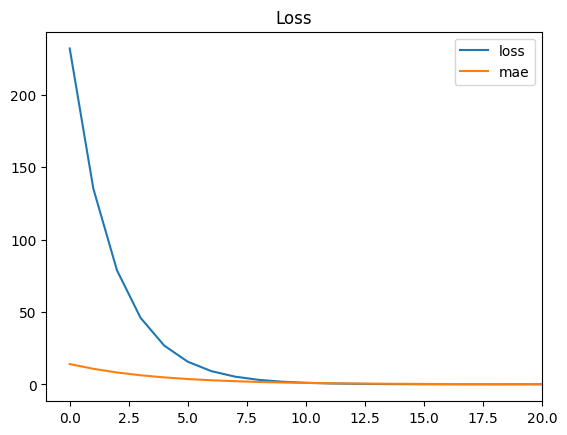

In [15]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

=> 첫 10epoch까지 손실이 급격히 감소하는 것을 확인할 수 있다. 그 이후는 감소 폭이 둔화되면서 조금씩 감소한다.

### **2-9. 검증**

evaluate() 메소드로 모델의 성능을 검증할 수 있다.

In [16]:
model.evaluate(x,y)

1/1 [==============================] - 0s 215ms/step - loss: 3.5957e-05 - mae: 0.0051


[3.595701127778739e-05, 0.005146789364516735]

=> 사전에 별도의 검증 데이터셋을 준비하여 모델의 성능을 평가하는 것이 일반적인 방법이다.

### **2-10. 예측**

predict()메소드에 새로운 입려 데이터를 넣어주면 예측 값을 얻을 수 있다.

* 괄호 안에 x 인자에 해당하는 값으로 숫자 10을 리스트 형태로 넣어준다.

In [17]:
model.predict([10]) # y = 3*10+2 = 32

1/1 [==============================] - 0s 87ms/step


array([[32.024876]], dtype=float32)

## **03. 심층 신경망으로 이미지 분류**

이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성한다.

### **3-1. 케라스 내장 데이터셋 로드**

케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공한다.

* 케라스의 datasets 패키지에 있는 데이터를 불러오기 위해서 load_data() 메소드를 사용한다.
* 이 함수는 훈련 데이터셋과 검증 데이터셋을 구분하여 제공한다.

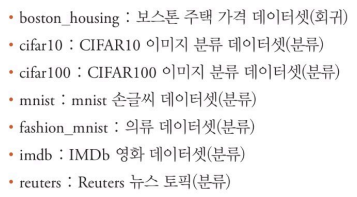

In [18]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


=> 훈련 셋에는 60000개의 데이터가 검증 셋에는 10000개 데이터가 저장되어 있다는 것을 확인할 수 있다.

=> 입력 데이터에 해당하는 x_train, x_test에는 mnist 손글씨 이미지 데이터가 저장되고, 배열의 shape은 (데이터셋 크기, 28, 28) 이다.

In [19]:
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


* 처음 15장에 대한 이미지 시각화

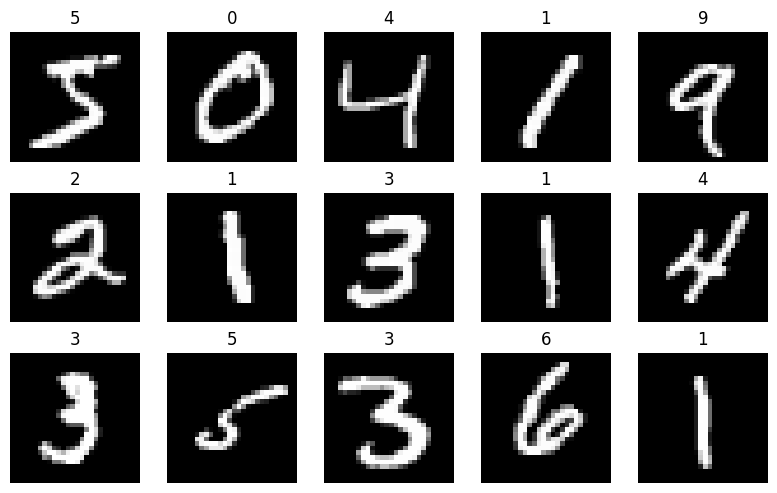

In [20]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### **3-2. 데이터 전처리**

이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절한다.

In [22]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* 정규화

In [25]:
# 픽셀 값의 최소/최대값 확인
print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}") # 0~255

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f"정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}") # 0~1

정규화 전] 최소값: 0.0, 최대값: 1.0
정규화 후] 최소값: 0.0, 최대값: 1.0


* 검증 셋에도 동일한 방식으로 정규화

In [26]:
x_test = x_test / x_test.max()

* 정규화 변환이 완료된 후, 데이터 출력

In [27]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### **3-3. Flatten 레이어**

정규화가 끝난 x_train의 shape는 (60000, 28,28)이다. 즉, 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만 원본 배열의 형태는 그대로 유지된다.

* 여기서, 2차원 입력은 Dense레이어에 입력값으로 넣을 수 없다.

* 1차원으로 만들기

In [30]:
print(f"변경 전 shape: {x_train.shape}")
print(f"1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}")

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


* flatten 레이러를 사용해 1차원으로

In [29]:
print(f"변경 전 shape: {x_train.shape}")
print(f"Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### **3-4. 활성화 함수**

활성화 함수는 입력을 비선형 출력으로 변환해주는 함수이다.
* 일반적으로 선형 관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다.
* 한편, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형 함수로 표현된다.

In [31]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [32]:
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

### **3-5. 입력과 출력**

input_shape 매개변수를 지정한다.
* 분류 모델의 가장 마지막 레이어는 출력층이다. 출력층의 노드 개수는 반드시 분류해야할 클래스 개수와 동일해야한다.
* 다중 분류 문제에서는 softmax활성화 함수를 사용해야한다.
* 이진 분류 문제에서는 sigmoid 활성화 함수를 적용한다. (단, 이진분류이더라도 원핫 인코딩으로 변환하여 노드 개수가 2인 경우 soft max를 사용해야한다.)

In [33]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [34]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

### **3-6. 손실 함수**

분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있다.

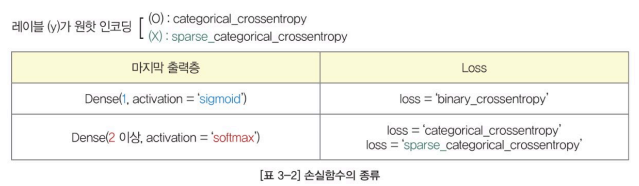

In [36]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss="binary_crossentropy")

# y가 원핫 벡터인 경우
# y가 원핫 벡터인 경우 ex. [0.. 0.. 1.. 0..]
model.compile(loss="categorical_crossentropy")

# y가 원핫 벡터가 아닌 경우
model.compile(loss="sparse_categorical_crossentropy")

### **3-7. 옵티마이저**

옵티마이저는 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법이다.

* 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘한다.
* SGD, Adam,Adagrad, Nadam, RMSprop,Adadelta, Adamax 등이 있음

In [37]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001) #클래스 인스턴스로 지정할 때는 학습률 하이퍼파라미터 직접 설정 가능
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam') #소문자로 문자열 지정

### **3-8. 평가지표**

* 분류 모델 평가지표 : accuracy, auc, precision, recall

In [38]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [39]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **3-9. 훈련**

In [40]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2293 - accuracy: 0.9314 - val_loss: 0.0992 - val_accuracy: 0.9701
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 0.1033 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0839 - val_accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0488 - accuracy: 0.9840 - val_loss: 0.0807 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0765 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0865 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0709 - val_ac

### **3-10. 평가**

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9795
검증 셋 정확도: 0.9794999957084656


### **3-11. 예측**

훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있다.

* predict() 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환한다.

In [42]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
# 예측 결과 출력
predictions[0]

array([7.6686044e-09, 3.5635537e-07, 1.5664175e-07, 8.2814182e-07,
       1.9977499e-08, 1.4563061e-08, 1.2828480e-10, 9.9999553e-01,
       5.5905809e-09, 2.9269736e-06], dtype=float32)

In [44]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


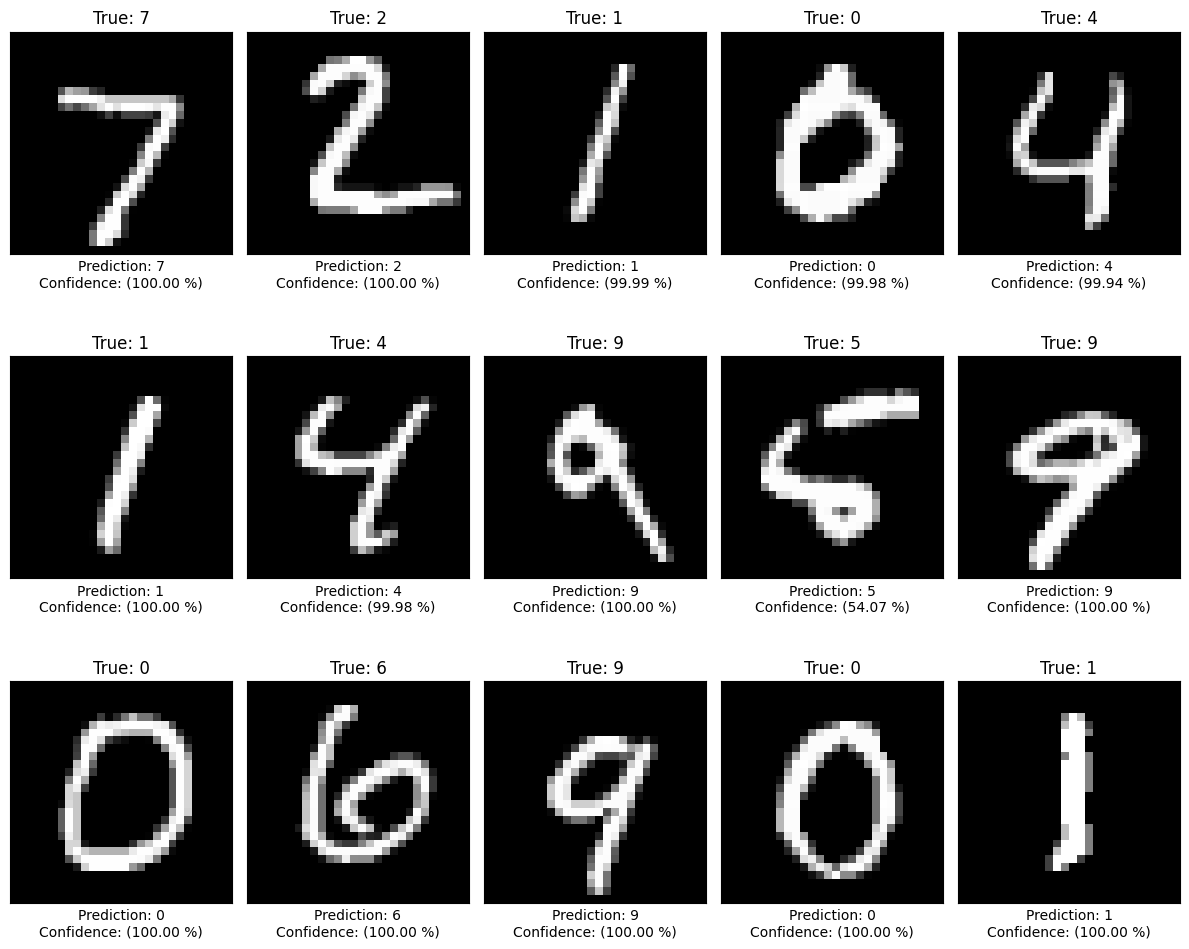

In [45]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()